Begin with importing the libraries that we will use

In [2]:
import numpy as np
import matplotlib.pyplot as plt

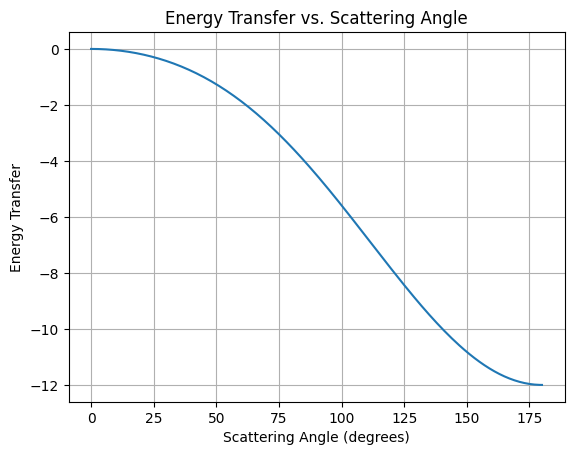

In [3]:
def energy_transfer(m1, m2, u1, theta):
    # Convert angle from degrees to radians
    theta_rad = np.radians(theta)

    # Calculate final velocities using conservation of energy and momentum
    v1_prime = (u1 * np.cos(theta_rad) * (m1 - m2) + 2 * m2 * u1) / (m1 + m2)
    v2_prime = (u1 * (np.cos(theta_rad) - 1) * m1) / (m1 + m2)

    # Calculate energy transfer
    initial_kinetic_energy = 0.5 * m1 * u1**2
    final_kinetic_energy = 0.5 * m1 * v1_prime**2 + 0.5 * m2 * v2_prime**2
    energy_transfer = initial_kinetic_energy - final_kinetic_energy

    return energy_transfer

# Parameters
m1 = 1.0   # Mass of the projectile
m2 = 2.0   # Mass of the target
u1 = 3.0   # Initial velocity of the projectile

# Scattering angles (from 0 to 180 degrees in steps of 1 degree)
theta_values = np.arange(0, 181, 1)

# Calculate energy transfer for each scattering angle
energy_transfers = [energy_transfer(m1, m2, u1, theta) for theta in theta_values]

# Plot the results
plt.plot(theta_values, energy_transfers)
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Energy Transfer')
plt.title('Energy Transfer vs. Scattering Angle')
plt.grid(True)
plt.show()

/var/folders/ql/vqlpd53x1l95jg4qfh2tn5tm0000gn/T/ipykernel_31925/2104771725.py:29: RuntimeWarning: invalid value encountered in arcsin
  theta_scattering = np.degrees(np.arcsin(impact_parameter * (m1 + m2) / u1))


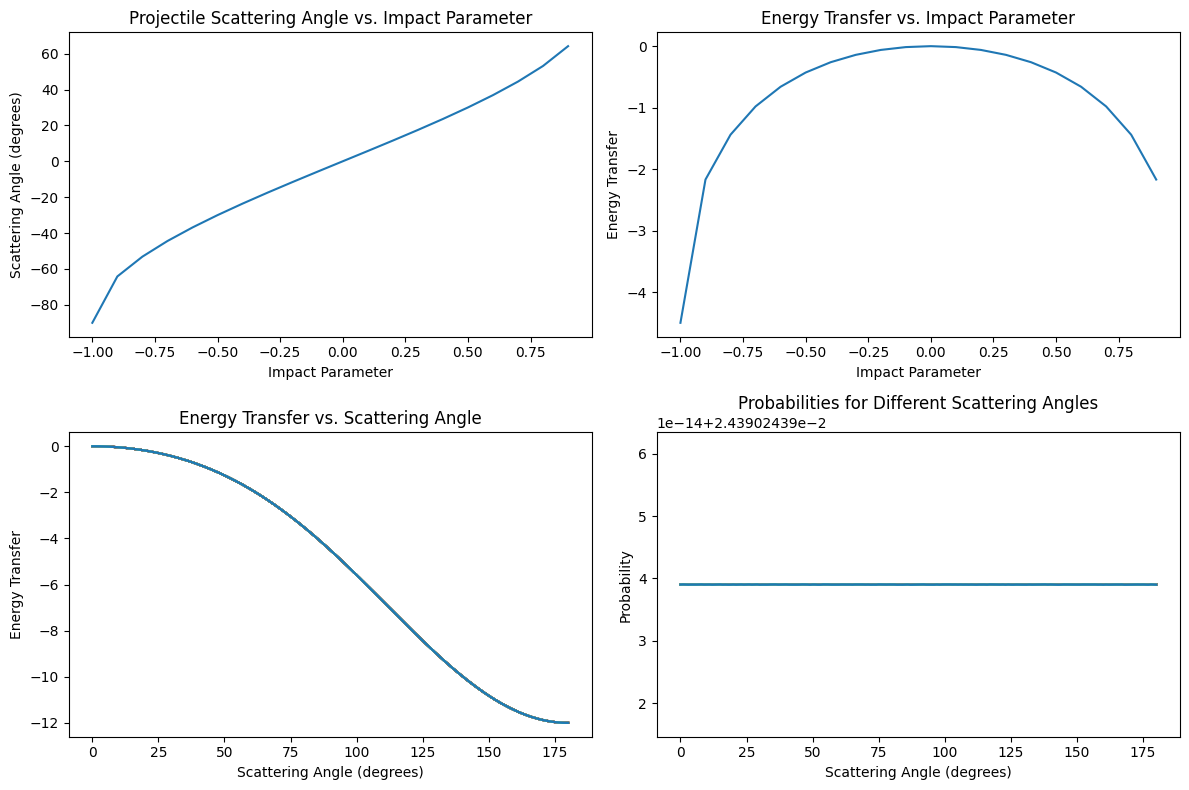

In [7]:
def calculate_impact_parameter(u1, theta):
    # Convert angle from degrees to radians
    theta_rad = np.radians(theta)

    # Calculate the impact parameter
    impact_parameter = u1 * np.sin(theta_rad) / (m1 + m2)

    return impact_parameter


# Parameters
m1 = 1.0   # Mass of the projectile
m2 = 2.0   # Mass of the target
u1 = 3.0   # Initial velocity of the projectile

# Scattering angles (from 0 to 180 degrees in steps of 1 degree)
theta_values = np.arange(0, 181, 1)

# Impact parameters (from -2 to 2 in steps of 0.1)
impact_parameters = np.arange(-2, 2.1, 0.1)

# Simulate projectiles with different impact parameters
scattering_angles = []
energy_transfers_impact = []
energy_transfers_angle = []

for impact_parameter in impact_parameters:
    # Calculate the projectile scattering angle
    theta_scattering = np.degrees(np.arcsin(impact_parameter * (m1 + m2) / u1))

    # Calculate the energy transfer
    energy_transfer_impact = energy_transfer(m1, m2, u1, theta_scattering)
    energy_transfer_angle = energy_transfer(m1, m2, u1, theta_values)

    scattering_angles.append(theta_scattering)
    energy_transfers_impact.append(energy_transfer_impact)
    energy_transfers_angle.append(energy_transfer_angle)

# Calculate probabilities for the different scattering angles
energy_transfers_angle_array = np.array(energy_transfers_angle)
probabilities = np.exp(-energy_transfers_angle_array)

# Normalize probabilities
probabilities /= np.sum(probabilities, axis=0)

# Plot the results
plt.figure(figsize=(12, 8))

# Projectile scattering angle vs. impact parameter
plt.subplot(2, 2, 1)
plt.plot(impact_parameters, scattering_angles)
plt.xlabel('Impact Parameter')
plt.ylabel('Scattering Angle (degrees)')
plt.title('Projectile Scattering Angle vs. Impact Parameter')

# Energy transfer from projectile to target vs. impact parameter
plt.subplot(2, 2, 2)
plt.plot(impact_parameters, energy_transfers_impact)
plt.xlabel('Impact Parameter')
plt.ylabel('Energy Transfer')
plt.title('Energy Transfer vs. Impact Parameter')

# Energy transfer vs. scattering angle
plt.subplot(2, 2, 3)
for i, energy_transfer_angle in enumerate(energy_transfers_angle):
    plt.plot(theta_values, energy_transfer_angle, label=f'Impact Parameter: {impact_parameters[i]:.1f}')
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Energy Transfer')
plt.title('Energy Transfer vs. Scattering Angle')
#plt.legend()

# Probabilities for different scattering angles
plt.subplot(2, 2, 4)
plt.plot(theta_values, probabilities.T)
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Probability')
plt.title('Probabilities for Different Scattering Angles')
#plt.legend([f'Impact Parameter: {impact_parameter:.1f}' for impact_parameter in impact_parameters], loc='upper right')

plt.tight_layout()
plt.show()